# Práctica 4: tranformación de datos numéricos

## Descripción del dataset

### Fifa 20 

<img src="fifa.jpg">

El dataset contiene las caracteristicas de los jugadores en el juego de FIFA 20 contenido en https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Recipe

### Transformación de variables numéricas

Convertir una variable numérica en otra variable numérica. Típicamente, su objetivo es cambiar la escala de valores y/o ajustar la distribución sesgada de los datos 

Para esta practica se utilizaran las siguientes variables

In [3]:
varc = ['height_cm', 'weight_kg', 'overall','potential', 'value_eur', 
        'wage_eur', 'release_clause_eur','team_jersey_number', 'pace', 'shooting', 
        'passing','dribbling', 'defending', 'physic']

In [4]:
X = df[varc]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("media: "+str(scaler.mean_[i]))
    print("varianza: "+str(scaler.var_[i]))
    print()
Xs1 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable height_cm
media: 181.36218404639456
varianza: 45.654028975427735

La variable weight_kg
media: 75.2763431447642
varianza: 49.667971921205606

La variable overall
media: 66.24499398183609
varianza: 48.29920762388325

La variable potential
media: 71.5468869679396
varianza: 37.69347400527823

La variable value_eur
media: 2484037.640879746
varianza: 31195891849332.703

La variable wage_eur
media: 9456.942772732247
varianza: 455870752.4872601

La variable release_clause_eur
media: 4740717.432273263
varianza: 121654094416739.69

La variable team_jersey_number
media: 20.10389178401153
varianza: 275.66555642514487

La variable pace
media: 67.70089890407586
varianza: 127.6291692449206

La variable shooting
media: 52.298300701884
varianza: 196.81244508677332

La variable passing
media: 57.23377662849403
varianza: 108.31654661627928

La variable dribbling
media: 62.53158478019948
varianza: 105.77369147935954

La variable defending
media: 51.55350326314493
varianza: 269.58428799804994


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("min: "+str(scaler.data_max_[i]))
    print("max: "+str(scaler.data_min_[i]))
    print()
Xs2 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable height_cm
min: 205.0
max: 156.0

La variable weight_kg
min: 110.0
max: 50.0

La variable overall
min: 94.0
max: 48.0

La variable potential
min: 95.0
max: 49.0

La variable value_eur
min: 105500000.0
max: 0.0

La variable wage_eur
min: 565000.0
max: 0.0

La variable release_clause_eur
min: 195800000.0
max: 13000.0

La variable team_jersey_number
min: 99.0
max: 1.0

La variable pace
min: 96.0
max: 24.0

La variable shooting
min: 93.0
max: 15.0

La variable passing
min: 92.0
max: 24.0

La variable dribbling
min: 96.0
max: 23.0

La variable defending
min: 90.0
max: 15.0

La variable physic
min: 90.0
max: 27.0



In [7]:
p25 = X.quantile(0.25)
p75 = X.quantile(0.75)
print("p01:\n", p25)
print()
print("p99:\n", p75)

p01:
 height_cm                177.0
weight_kg                 70.0
overall                   62.0
potential                 67.0
value_eur             325000.0
wage_eur                1000.0
release_clause_eur    563000.0
team_jersey_number         9.0
pace                      61.0
shooting                  42.0
passing                   50.0
dribbling                 57.0
defending                 36.0
physic                    59.0
Name: 0.25, dtype: float64

p99:
 height_cm                 186.0
weight_kg                  80.0
overall                    71.0
potential                  75.0
value_eur             2100000.0
wage_eur                 8000.0
release_clause_eur    3700000.0
team_jersey_number         27.0
pace                       75.0
shooting                   63.0
passing                    64.0
dribbling                  69.0
defending                  65.0
physic                     72.0
Name: 0.75, dtype: float64


In [8]:
aux = X.dropna()

In [9]:
Xs3 = aux.clip(p25,p75,axis=1).astype('int')
Xs3.head()

,height_cm,weight_kg,overall,potential,value_eur,wage_eur,release_clause_eur,team_jersey_number,pace,shooting,passing,dribbling,defending,physic
0,177,72,71,75,2100000,8000,3700000,10,75,63,64,69,39,66
1,186,80,71,75,2100000,8000,3700000,9,75,63,64,69,36,72
2,177,70,71,75,2100000,8000,3700000,10,75,63,64,69,36,59
4,177,74,71,75,2100000,8000,3700000,9,75,63,64,69,36,66
5,181,70,71,75,2100000,8000,3700000,17,75,63,64,69,61,72


In [10]:
for i in varc:
    print("La variable "+str(i))
    print(pd.cut(X[i], bins=10, labels=False).value_counts())
    print()

La variable height_cm
4    4713
5    4710
6    3384
3    2714
7    1379
2     961
8     249
1     135
9      22
0      11
Name: height_cm, dtype: int64

La variable weight_kg
4    5874
3    5412
5    2827
2    2538
6     944
1     466
7     168
0      30
8      17
9       2
Name: weight_kg, dtype: int64

La variable overall
3    5222
4    4714
5    2426
2    2380
1    1423
6    1204
0     498
7     303
8      98
9      10
Name: overall, dtype: int64

La variable potential
4    5781
5    3969
3    3766
6    2506
7     898
2     873
8     284
1     161
9      23
0      17
Name: potential, dtype: int64

La variable value_eur
0    17418
1      571
2      156
3       63
4       35
5       16
6        9
7        5
8        3
9        2
Name: value_eur, dtype: int64

La variable wage_eur
0    17820
1      310
2       83
3       38
4       13
5        7
6        4
9        1
8        1
7        1
Name: wage_eur, dtype: int64

La variable release_clause_eur
0.0    16064
1.0      614
2.0      16

In [11]:
aux['weight_kg'].rank().astype('int').value_counts()

3921     1300
8236     1225
5561      872
6415      835
10738     814
12071     795
7228      791
9221      745
9962      738
2474      652
4848      554
11409     528
3036      471
1148      448
1931      434
13066     434
12659     381
13462     357
1543      342
13799     318
14100     284
787       275
14342     199
557       185
14658     148
14513     143
393       142
176       134
14858      86
14774      83
283        79
14961      45
14920      37
60         33
93         33
15022      27
14996      25
15044      17
36         15
22         13
15057      10
15065       6
7           6
13          5
15070       3
15075       3
3           2
2           1
15077       1
15073       1
1           1
15072       1
Name: weight_kg, dtype: int64

In [32]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=1000, random_state=1111, output_distribution='normal')
transformer.fit(X[['value_eur']])
E = transformer.transform(df[['value_eur']])

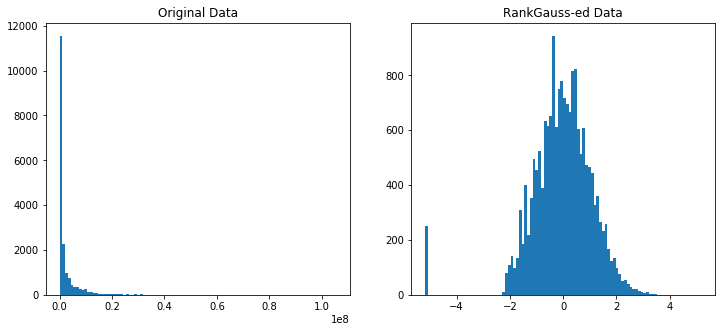

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['value_eur'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(E,bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()